**Predicting Employee Attrition with Classification Models**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Libraries**

In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    RocCurveDisplay,
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV


pd.set_option("display.max_columns", None)



**Loading Data**

In [ ]:
from pathlib import Path
DATA_PATH = Path("/content/drive/MyDrive/Adv Business Assignment/WA_Fn-UseC_-HR-Employee-Attrition.csv")

**Data Understanding and Preperation**

In [ ]:
#Load the dataset and inspect the data
df = pd.read_csv(DATA_PATH)
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [ ]:
df.shape

(1470, 35)

The result shows that the dataset contains 1470 employees and 35 features describing their demographic information, job-related characteristics, performance measures, and various satisfaction levels.

In [ ]:
#Basic Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Exploratory Data Analysis (EDA)**

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


From the above summary statistics, we can see that employees in the dataset span a wide range of ages, incomes, and experience levels, with the average employee being about 37 years old and earning roughly $6,500 per month. Variables such as TotalWorkingYears, YearsAtCompany, and YearsWithCurrManager show substantial variation, reflecting diverse career stages within the company. Likewise, fields like EmployeeCount and StandardHours remain constant across all employees, meaning they do not carry predictive value. Overall, the dataset provides a comprehensive mix of demographic, performance, and job-related information that supports meaningful attrition analysis.

Attrition Counts:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Attrition Percentages:
Attrition
No     83.88
Yes    16.12
Name: proportion, dtype: float64


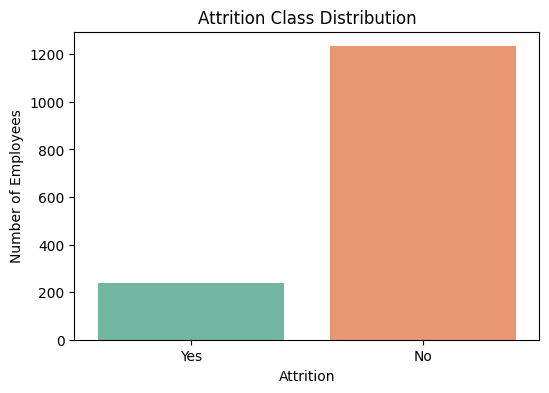

In [ ]:
#Checking for Class Balance with counts and percentages
attrition_counts = df['Attrition'].value_counts()
attrition_percent = df['Attrition'].value_counts(normalize=True) * 100

print("Attrition Counts:")
print(attrition_counts)

print("\nAttrition Percentages:")
print(attrition_percent.round(2))

#Countplot of Attrition
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition', hue='Attrition', palette='Set2', legend=False)
plt.title('Attrition Class Distribution')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.show()

The attrition distribution indicates that a large percentage of employees in the dataset stayed with the company.  In this case, only 237 employees (16.12%) left the company, while 1233 employees (83.88%) stayed.  With attrition cases making up a far smaller percentage of the workforce, this suggests that the data set is highly imbalanced.

OverTime Value Counts:

OverTime
No     1054
Yes     416
Name: count, dtype: int64


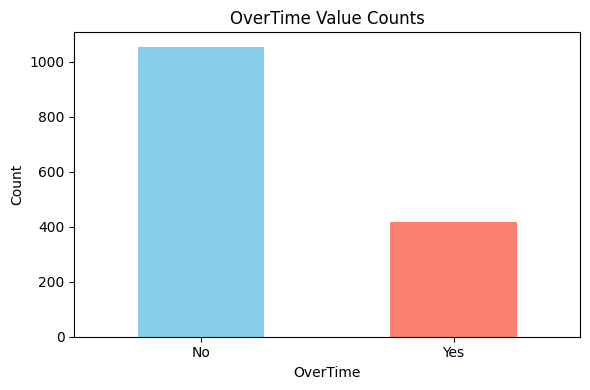

In [ ]:
#Print the value counts
print("OverTime Value Counts:\n")
print(df['OverTime'].value_counts())

#Plot the value counts
plt.figure(figsize=(6,4))
df['OverTime'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('OverTime Value Counts')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


With 1054 people responding "No" for overtime, the OverTime distribution reveals that most employees in the dataset do not work overtime.  On the other hand, 416 workers put in extra effort and time.

Job Role Value Counts:

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


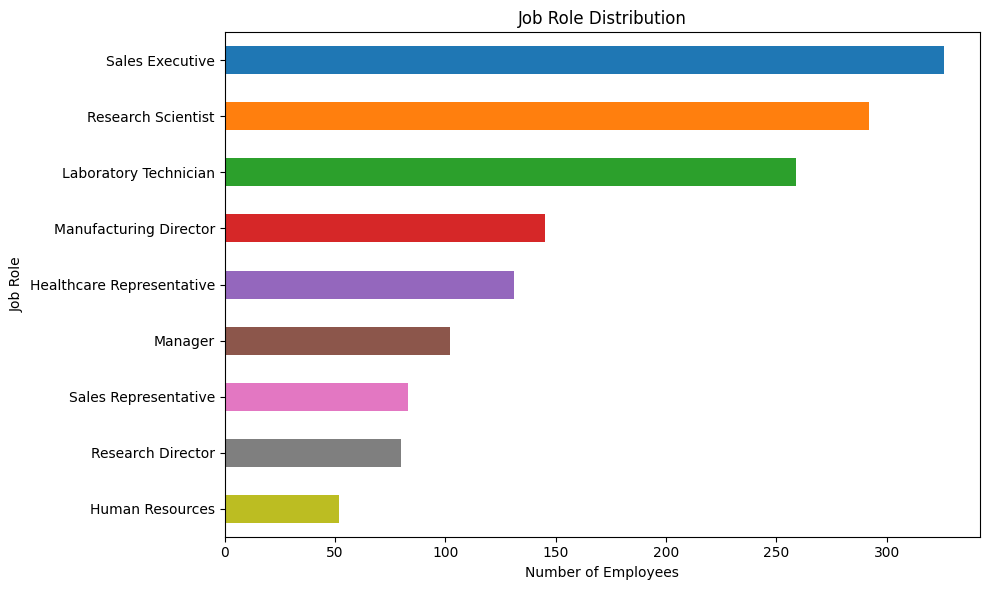

In [ ]:
#Print JobRole value counts
print("Job Role Value Counts:\n")
print(df['JobRole'].value_counts())

#Counts sorted from high to low
jobrole_counts = df['JobRole'].value_counts()

plt.figure(figsize=(10,6))

#Creating a unique color for each bar
colors = sns.color_palette("tab10", len(jobrole_counts))

#Plot
jobrole_counts.plot(
    kind='barh',
    color=colors
)

plt.title('Job Role Distribution')
plt.xlabel('Number of Employees')
plt.ylabel('Job Role')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


The job role distribution plot shows that Sales Executives, Research Scientists, and Laboratory Technicians are the largest job groups in the company, while Human Resources, Research Directors, and Sales Representatives have the smallest counts. Given that higher jobs inherently contribute more to overall turnover, this aids in understanding attrition patterns.

OverTime Value Counts:

OverTime
No     1054
Yes     416
Name: count, dtype: int64

OverTime by Attrition:

Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127


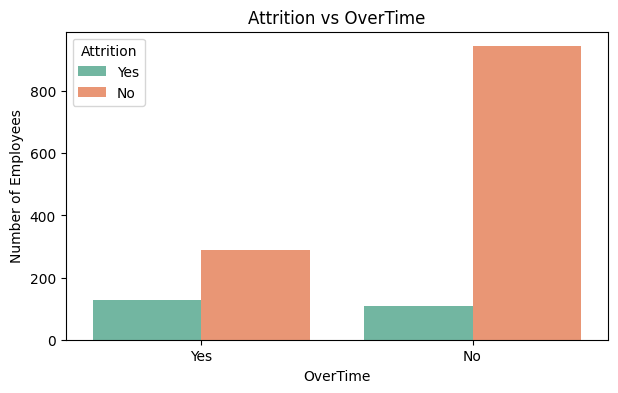

In [ ]:
#Print counts
print("OverTime Value Counts:\n")
print(df['OverTime'].value_counts())

print("\nOverTime by Attrition:\n")
print(pd.crosstab(df['OverTime'], df['Attrition']))

#Plot
plt.figure(figsize=(7,4))
sns.countplot(
    x='OverTime',
    hue='Attrition',
    data=df,
    palette='Set2'
)
plt.title('Attrition vs OverTime')
plt.xlabel('OverTime')
plt.ylabel('Number of Employees')
plt.show()


The barplot shows a strong relationship between overtime and attrition. Employees who work overtime have a noticeably higher number of attrition cases compared to those who do not work overtime. While the majority of the workforce does not work overtime, the attrition count among overtime workers is significantly higher.This shows that overtime workload contributes to employee burnout, hence increasing the likelihood of an employee leaving the company.

JobRole Value Counts:

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

JobRole by Attrition:

Attrition                   No  Yes
JobRole                            
Healthcare Representative  122    9
Human Resources             40   12
Laboratory Technician      197   62
Manager                     97    5
Manufacturing Director     135   10
Research Director           78    2
Research Scientist         245   47
Sales Executive            269   57
Sales Representative        50   33


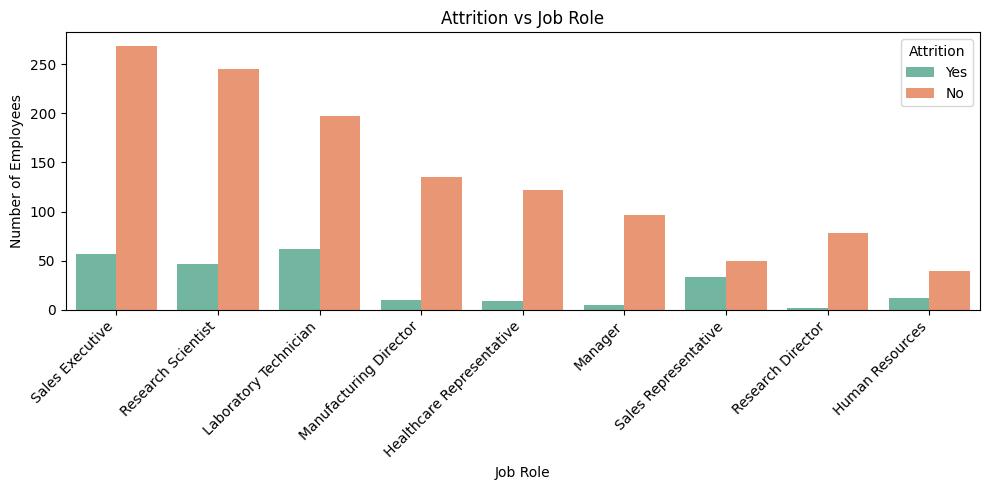

In [ ]:
#Print counts Okay Now can you
print("JobRole Value Counts:\n")
print(df['JobRole'].value_counts())

print("\nJobRole by Attrition:\n")
print(pd.crosstab(df['JobRole'], df['Attrition']))

#Plot
plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x='JobRole',
    hue='Attrition',
    palette='Set2'
)
plt.title('Attrition vs Job Role')
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The plot shows how attrition rates differ among various employment roles. When compared to positions like Manager, Research Director, or Human Resources, which have extremely low attrition, positions like Laboratory Technician, Sales Executive, and Research Scientist show a higher employee turnover

Monthly Income Summary by Attrition:

            count     mean      std     min     25%     50%     75%      max
Attrition                                                                   
No         1233.0  6832.74  4818.21  1051.0  3211.0  5204.0  8834.0  19999.0
Yes         237.0  4787.09  3640.21  1009.0  2373.0  3202.0  5916.0  19859.0


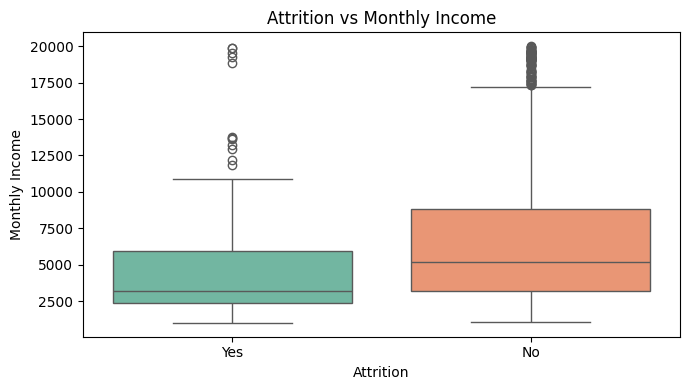

In [ ]:
#Print summary of Monthly Income by Attrition
print("Monthly Income Summary by Attrition:\n")
print(df.groupby('Attrition')['MonthlyIncome'].describe().round(2))

# Plot
plt.figure(figsize=(7,4))
sns.boxplot(
    x='Attrition',
    y='MonthlyIncome',
    data=df,
    hue='Attrition',
    palette='Set2',
    legend=False
)
plt.title('Attrition vs Monthly Income')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.tight_layout()
plt.show()


The plot shows that employees who left the company have lower monthly income as compared to the one who decided to stay. As we can see, the average income for employees who stayed is 6,832, while those who left the company earn a lower average of 4,787. Therefore, this indicates that lower compensation may contribute to higher attrition.

Age Summary by Attrition:

            count   mean   std   min   25%   50%   75%   max
Attrition                                                   
No         1233.0  37.56  8.89  18.0  31.0  36.0  43.0  60.0
Yes         237.0  33.61  9.69  18.0  28.0  32.0  39.0  58.0


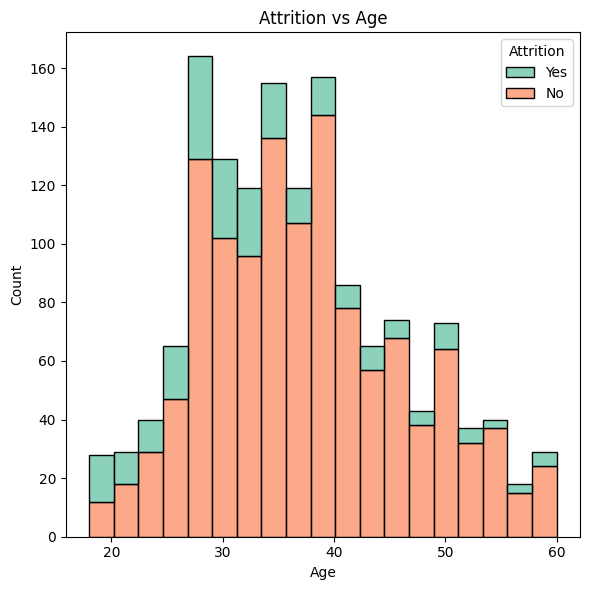

In [ ]:
# Summary of Age by Attrition
print("Age Summary by Attrition:\n")
print(df.groupby('Attrition')['Age'].describe().round(2))

# Histogram Plot
plt.figure(figsize=(6,6))
sns.histplot(
    data=df,
    x='Age',
    hue='Attrition',
    multiple='stack',
    palette='Set2'
)
plt.title('Attrition vs Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


The plot shows that employees who left the company are generally younger, with an average age of 33.6 compared to 37.6 for those who stayed. This shows that attrition is more common among younger employees.

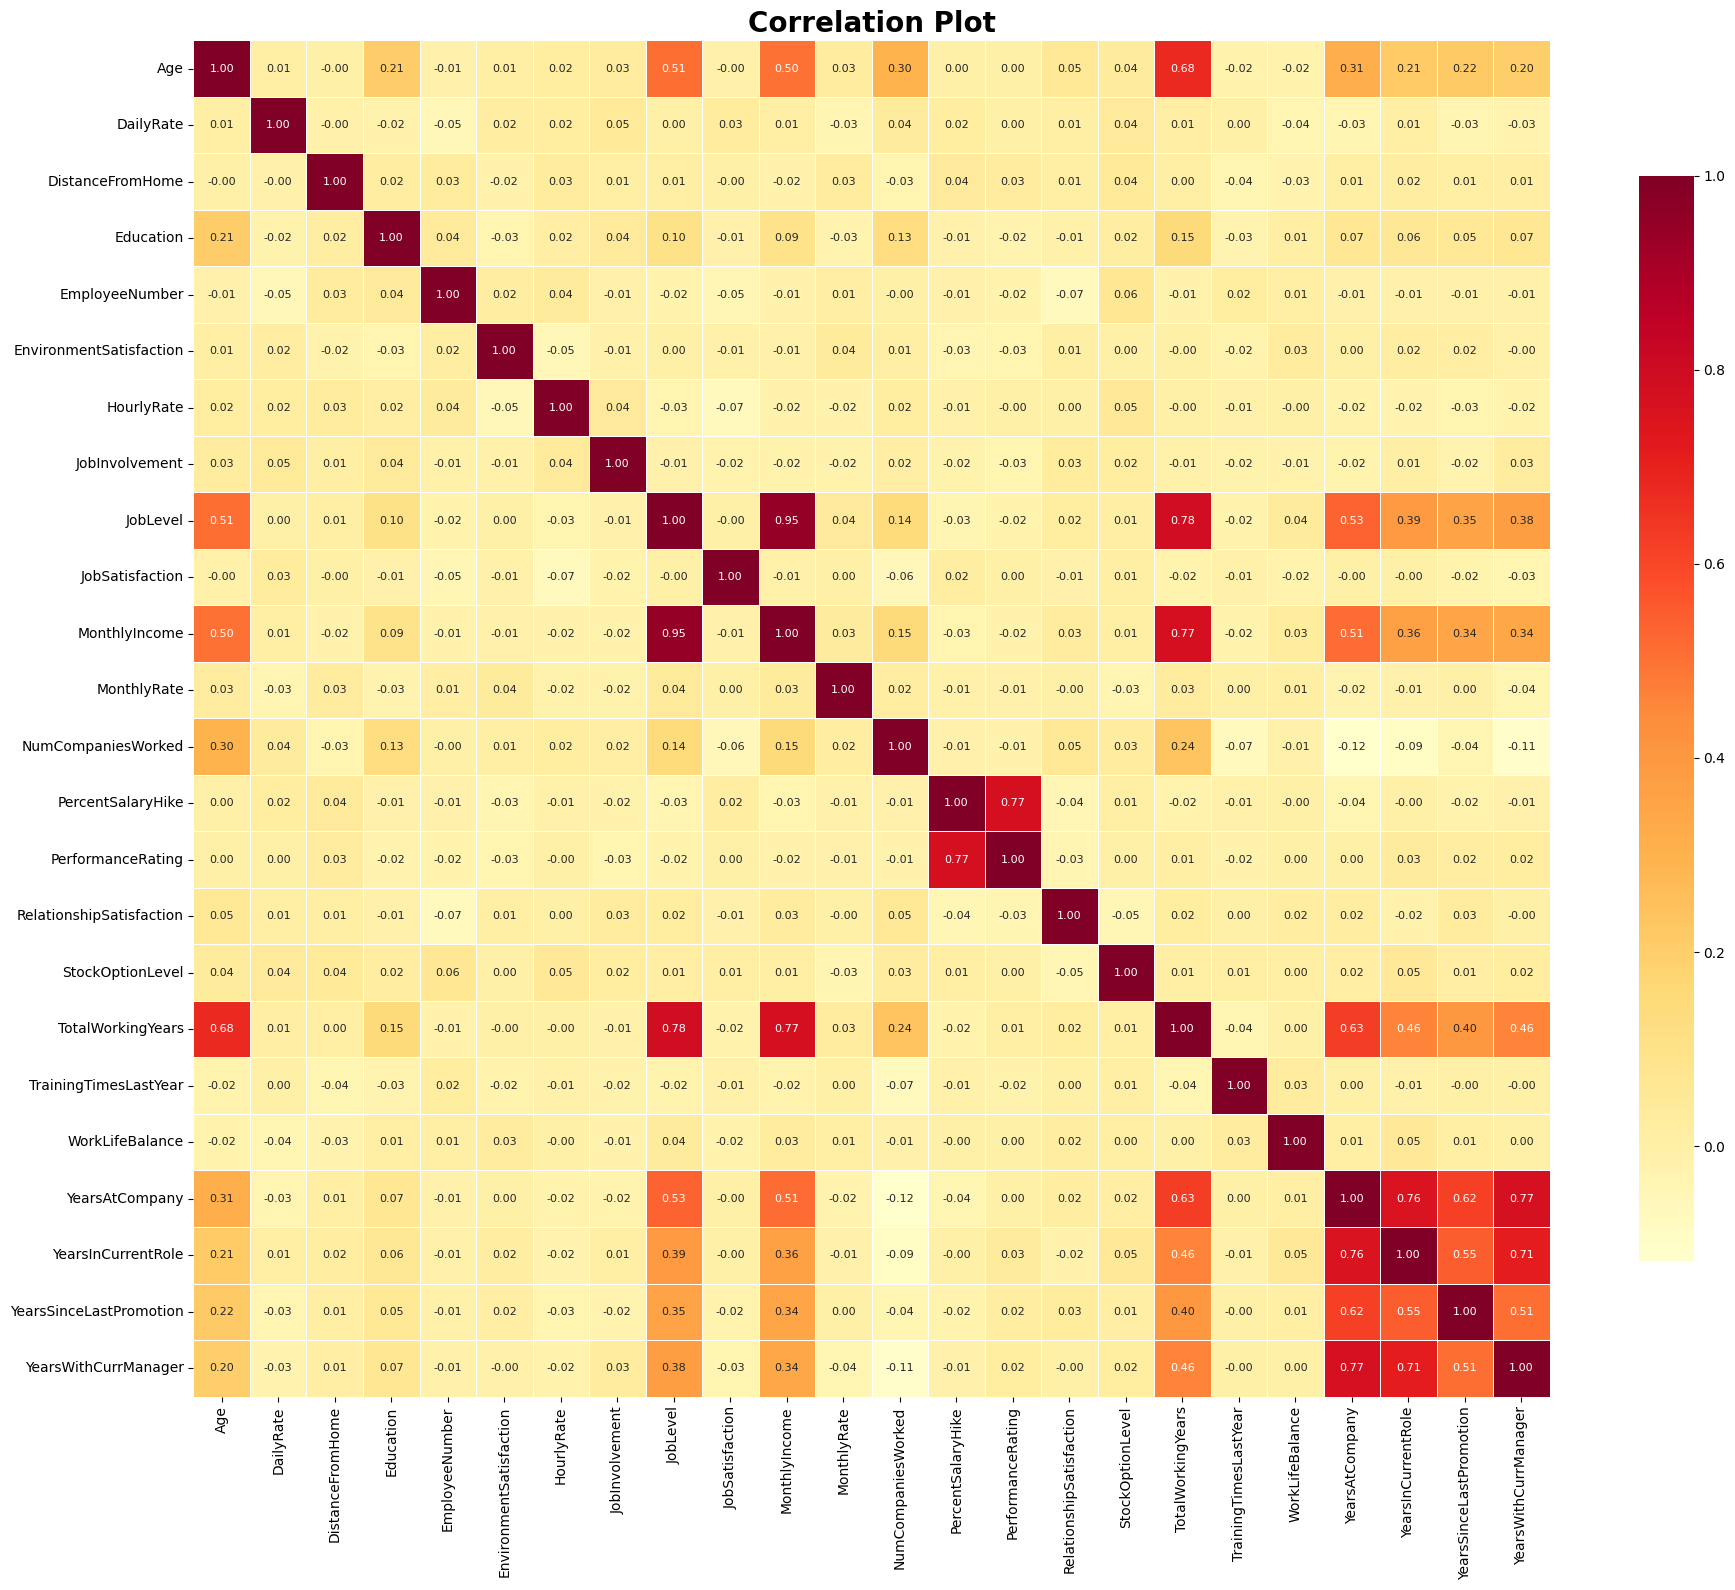

Plotting correlation for 24 numeric variables


In [ ]:
#Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Remove columns with zero variance (constant values)
# These create gaps in the correlation plot
numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]

# OR manually drop known constant columns
numeric_df = numeric_df.drop(columns=['EmployeeCount', 'StandardHours'], errors='ignore')

# Create correlation plot without gaps
plt.figure(figsize=(20, 16))
plt.title("Correlation Plot", fontsize=20, fontweight='bold')

sns.heatmap(numeric_df.corr(),
            linewidths=0.5,
            annot=True,
            square=True,
            annot_kws={'size': 8},
            cmap='YlOrRd',
            fmt='.2f',
            cbar_kws={'shrink': 0.8})

plt.tight_layout()
plt.show()

print(f"Plotting correlation for {len(numeric_df.columns)} numeric variables")

The correlation matrix shows that Monthly Income is strongly related to Job Level and Total Working Years, meaning more experienced employees in higher positions tend to earn more. Age also correlates with overall experience and tenure. Most other variables, including satisfaction scores, show very weak correlations, indicating they capture different and independent aspects of employee behavior.

In [ ]:
cols = ["JobLevel", "TotalWorkingYears", "PercentSalaryHike", "YearsInCurrentRole", "YearsWithCurrManager"]

df.drop(columns=cols, inplace=True, errors='ignore')

print(f"Dropped features (ignoring missing columns): {cols}")
print(f"After dropping {len(cols)} features, new shape: {df.shape}")


Dropped features (ignoring missing columns): ['JobLevel', 'TotalWorkingYears', 'PercentSalaryHike', 'YearsInCurrentRole', 'YearsWithCurrManager']
After dropping 5 features, new shape: (1470, 30)


Columns like JobLevel, TotalWorkingYears, PercentageSalaryHike, YearsInCurrentRole and YearsWithCurrManager were removed as they were highly correlated with other features in the dataset. Dropping these variables helps reduce multicollinearity, avoids redundancy, and improves model interpretability and stability, especially for linear models like Logistic Regression.

**One-Hot Encoding**

We treat Attrition as the binary target and one-hot encode all categorical predictors.

In [ ]:

#Creating binary target 'y' (Attrition 'Yes' = 1, else 0)

y =(df['Attrition'].str.strip().str.lower() == "yes").astype(int)

#Define features X (dropping the target and any identifiers like EmployeeNumber)
#We are dropping employee number as it does not help in prediction

X = df.drop(columns=["Attrition", "EmployeeNumber"], errors="ignore")

#Identifying numeric and categorical columns
num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

print("Numeric columns:", len(num_cols))
print(num_cols)
print("\nCategorical columns:", len(cat_cols))
print(cat_cols)

#One-Hot Encode Categorical Variables
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

#Reindexing Columns Alphabetically for Consistent Ordering
X_encoded = X_encoded.reindex(sorted(X_encoded.columns), axis=1)

print("\nShape after encoding:", X_encoded.shape)


Numeric columns: 25
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Categorical columns: 8
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

Shape after encoding: (1470, 46)


**Splitting Data into Train and Test with Stratification and Feature Scaling**

In [ ]:
#Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)
#Scaling Numeric Features
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training Set (Scaled):", X_train_scaled.shape)
print("Test Set (Scaled):", X_test_scaled.shape)

Training Set (Scaled): (1029, 46)
Test Set (Scaled): (441, 46)


**Helper Function to Train and Evaluate Models**

In [ ]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    # Fit
    model.fit(X_train, y_train)

    # Predictions on test
    y_pred_test = model.predict(X_test)

    # Scores/probabilities for test
    # The 'proba' variable was undefined. Removing it and directly checking for predict_proba/decision_function.
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = (
            model.decision_function(X_test)
            if hasattr(model, "decision_function")
            else y_pred_test # Corrected 'y_pred' to 'y_pred_test'
        )

    acc = accuracy_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test)
    rec = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    try:
        auc = roc_auc_score(y_test, y_score)
    except Exception:
        auc = np.nan

    cm = confusion_matrix(y_test, y_pred_test)

    return {
        "model": name,
        "test_accuracy": acc, # Corrected from acc_test to acc
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": auc,
        "confusion_matrix": cm,
        "estimator": model,
    }

In [ ]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test, proba=True):
    """Train a model, compute key metrics, and return a results dict."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if proba and hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = (
            model.decision_function(X_test)
            if hasattr(model, "decision_function")
            else y_pred
        )

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    try:
        auc = roc_auc_score(y_test, y_score)
    except Exception:
        auc = np.nan

    cm = confusion_matrix(y_test, y_pred)

    return {
        "model": name,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": auc,
        "confusion_matrix": cm,
        "estimator": model,
    }


In [ ]:
# SMOTE for scaled data (Logistic Regression, SVM, MLP)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# SMOTE for unscaled data (Tree-based models)
smote_tree = SMOTE(random_state=42)
X_train_balanced_unscaled, y_train_balanced_unscaled = smote_tree.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print(f"Original class distribution: {y_train.value_counts().to_dict()}")
print(f"After SMOTE: {y_train_balanced.value_counts().to_dict()}")

Original class distribution: {0: 863, 1: 166}
After SMOTE: {0: 863, 1: 863}


**Training Baseline Model : Logistic Regression**

In [ ]:
#Baseline Model: Logistic Regression (Using scaled data)
results = []
log_reg = LogisticRegression(max_iter=1000, solver="lbfgs")
results.append(
    evaluate_model(
        name = "Logistic Regression",
        model=log_reg,
        X_train=X_train_balanced,
        X_test=X_test_scaled,
        y_train=y_train_balanced,
        y_test=y_test
    )
)
coef_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': results[0]['estimator'].coef_[0]
})
print("\nTop 5 Coefficients:")
top_coef = coef_df.sort_values(
    "Coefficient", key=lambda x: abs(x), ascending=False
).head(5)
print(top_coef)
results_df = pd.DataFrame([
    {k: v for k, v in r.items() if k not in ["confusion_matrix", "estimator"]}
    for r in results
])

print("\nModel Performance Summary:")
display(results_df.sort_values("roc_auc", ascending=False))


Top 5 Coefficients:
                          Feature  Coefficient
25        JobRole_Sales Executive     1.058334
20  JobRole_Laboratory Technician     0.937519
18                       JobLevel     0.907447
39              TotalWorkingYears    -0.874523
8    EducationField_Life Sciences    -0.844556

Model Performance Summary:


,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.773243,0.373913,0.605634,0.462366,0.798858


In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=6)
results.append(
    evaluate_model("Decision Tree", dt,
                   X_train_balanced_unscaled, X_test,
                   y_train_balanced_unscaled, y_test)
)

# Random Forest
rf = RandomForestClassifier(n_estimators=300, random_state=42, max_depth=None)
results.append(
    evaluate_model("Random Forest", rf,
                   X_train_balanced_unscaled, X_test,
                   y_train_balanced_unscaled, y_test)
)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
results.append(
    evaluate_model("Gradient Boosting", gb,
                   X_train_balanced_unscaled, X_test,
                   y_train_balanced_unscaled, y_test)
)

In [ ]:
results = []

# Decision Tree (uses UNSCALED balanced data)
dt = DecisionTreeClassifier(random_state=42, max_depth=6)
results.append(
    evaluate_model("Decision Tree", dt,
                   X_train_balanced_unscaled, X_test,
                   y_train_balanced_unscaled, y_test)
)

# Random Forest (uses UNSCALED balanced data)
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    max_depth=None,
)
results.append(
    evaluate_model("Random Forest", rf,
                   X_train_balanced_unscaled, X_test,
                   y_train_balanced_unscaled, y_test)
)

# Gradient Boosting (uses UNSCALED balanced data)
gb = GradientBoostingClassifier(random_state=42)
results.append(
    evaluate_model("Gradient Boosting", gb,
                   X_train_balanced_unscaled, X_test,
                   y_train_balanced_unscaled, y_test)
)

# Support Vector Machine (SVM) (uses SCALED balanced data)
svm_clf = SVC(kernel="rbf", probability=True, random_state=42)
results.append(
    evaluate_model("SVM (RBF)", svm_clf,
                   X_train_balanced, X_test_scaled,
                   y_train_balanced, y_test)
)

# Neural Network (MLP) (uses SCALED balanced data)
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    max_iter=500,
    random_state=42,
)
results.append(
    evaluate_model("Neural Network (MLP)", mlp,
                   X_train_balanced, X_test_scaled,
                   y_train_balanced, y_test)
)

results_df = pd.DataFrame([
    {k: v for k, v in r.items() if k not in ["confusion_matrix", "estimator"]}
    for r in results
])
results_df.sort_values("roc_auc", ascending=False)

,model,accuracy,precision,recall,f1,roc_auc
2,Gradient Boosting,0.825397,0.442308,0.323944,0.373984,0.761591
4,Neural Network (MLP),0.820862,0.437500,0.394366,0.414815,0.749524
3,SVM (RBF),0.818594,0.428571,0.380282,0.402985,0.734431
1,Random Forest,0.834467,0.477273,0.295775,0.365217,0.722383
0,Decision Tree,0.739229,0.310345,0.507042,0.385027,0.637400


**Model Performance Interpretation**

Overall, Gradient Boosting achieved the best balance of performance with the highest ROC-AUC (0.76), indicating strong ability to distinguish between employees who stay and those who leave. The Neural Network and SVM models also performed well with competitive recall and F1-scores. Random Forest had the highest accuracy (0.83) but struggled to identify attrition cases due to its low recall. The Decision Tree model performed the weakest overall, showing lower accuracy and ROC-AUC compared to the other models.

**Hyperparaterter Tuning**

Hyperparameter tuning was performed to improve the performance of the tree-based models by selecting the best parameter settings, allowing the models to generalize better and achieve higher predictive accuracy for employee attrition.

Best max_depth for Decision Tree: 7

Top 10 Features by Importance Across Tree-Based Models:
                      Feature  Importance                  Model
36           StockOptionLevel    0.201250  Decision Tree (Tuned)
118          StockOptionLevel    0.144421      Gradient Boosting
29              MonthlyIncome    0.106076  Decision Tree (Tuned)
111             MonthlyIncome    0.094781      Gradient Boosting
70              MonthlyIncome    0.084651          Random Forest
34   RelationshipSatisfaction    0.080886  Decision Tree (Tuned)
109     MaritalStatus_Married    0.075868      Gradient Boosting
77           StockOptionLevel    0.072983          Random Forest
26            JobSatisfaction    0.072358  Decision Tree (Tuned)
30                MonthlyRate    0.061470  Decision Tree (Tuned)


<Figure size 640x480 with 0 Axes>

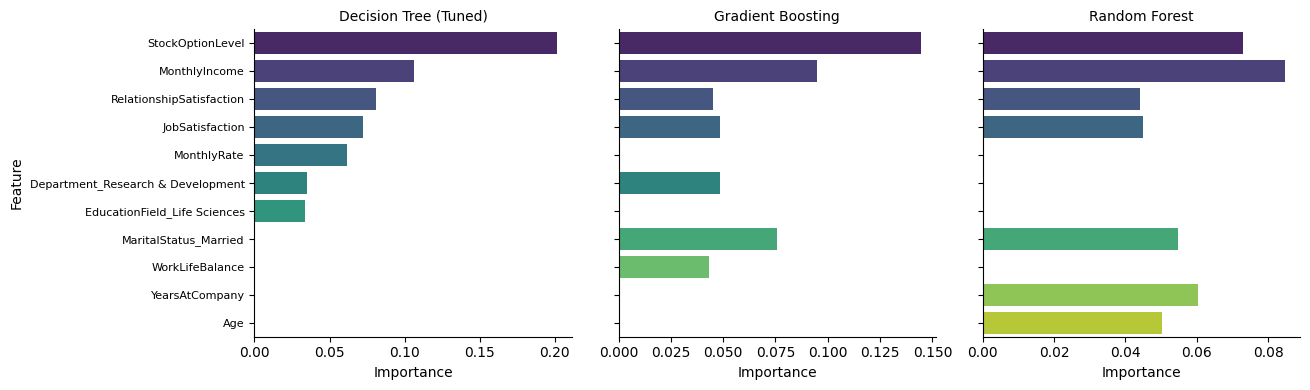

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#Tree-Based Models & Feature Importance

#Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt_param_grid = {
    "max_depth": [3, 5, 7, None]
}
dt_grid = GridSearchCV(
    estimator=dt,
    param_grid=dt_param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

dt_grid.fit(X_train_balanced_unscaled, y_train_balanced_unscaled)
print(f"Best max_depth for Decision Tree: {dt_grid.best_params_['max_depth']}")

results.append(
    evaluate_model(
        name="Decision Tree (Tuned)",
        model=dt_grid.best_estimator_,
        X_train=X_train_balanced_unscaled,
        X_test=X_test,
        y_train=y_train_balanced_unscaled,
        y_test=y_test
    )
)


#Random Forest

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

results.append(
    evaluate_model(
        name="Random Forest",
        model=rf,
        X_train=X_train_balanced_unscaled,
        X_test=X_test,
        y_train=y_train_balanced_unscaled,
        y_test=y_test
    )
)


#Gradient Boosting
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
results.append(
    evaluate_model(
        name="Gradient Boosting",
        model=gb,
        X_train=X_train_balanced_unscaled,
        X_test=X_test,
        y_train=y_train_balanced_unscaled,
        y_test=y_test
    )
)


#Feature Importance Analysis (Tree-Based Models)
feature_importances = []
feature_names = X_encoded.columns.tolist()  # encoded feature names

tree_model_names = ["Decision Tree (Tuned)", "Random Forest", "Gradient Boosting"]

for i, name in enumerate(tree_model_names):
    # Grab the last 3 models added to results in order: DT, RF, GB
    estimator = results[-(3 - i)]["estimator"]
    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": estimator.feature_importances_,
        "Model": name
    })
    feature_importances.append(importance_df)

all_importances = pd.concat(feature_importances, ignore_index=True)

print("\nTop 10 Features by Importance Across Tree-Based Models:")
print(all_importances.sort_values("Importance", ascending=False).head(10))

# Pick top N features per model
top_n = 7
top_per_model = (
    all_importances
    .sort_values(["Model", "Importance"], ascending=[True, False])
    .groupby("Model")
    .head(top_n)
)

plt.figure()

g = sns.catplot(
    data=top_per_model,
    x="Importance",
    y="Feature",
    hue="Feature",
    col="Model",
    kind="bar",
    sharex=False,
    palette="viridis",
    legend=False,
    height=4,
    aspect=1.1
)

g.set_titles("{col_name}")
g.set_axis_labels("Importance", "Feature")

for ax in g.axes.flat:
    ax.tick_params(axis="y", labelsize=8)

plt.tight_layout()
plt.show()


In [ ]:
#Support Vector Machine (SVM)
svm_clf = SVC(random_state=42, probability=True)
svm_param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["rbf"],
    "gamma": ["scale", "auto"]
}
#MLP Classifier
mlp = MLPClassifier(random_state=42, max_iter=500)
mlp_param_grid = {
    "hidden_layer_sizes": [(64, 32)],   #hidden layer sizes 64 and 32
    "activation": ["relu", "tanh"],
    "alpha": [0.0001, 0.001]
}

**Centralized Model**

In [ ]:
#Store models and their parameter grids in a dictionary
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg_param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"]
}

dt = DecisionTreeClassifier(random_state=42)
dt_param_grid = {
    "max_depth": [3, 5, 7, None]
}

rf = RandomForestClassifier(random_state=42)
rf_param_grid = {
    "n_estimators": [200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

gb = GradientBoostingClassifier(random_state=42)
gb_param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

#Support Vector Machine (SVM)
svm_clf = SVC(random_state=42, probability=True)
svm_param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["rbf"],
    "gamma": ["scale", "auto"]
}
#MLP Classifier
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    max_iter=500,
    random_state=42,
)
mlp_param_grid = {
    "hidden_layer_sizes": [(64, 32)],   #hidden layer sizes 64 and 32
    "activation": ["relu", "tanh"],
    "alpha": [0.0001, 0.001]
}

models_and_params = {
    "Logistic Regression": (log_reg, log_reg_param_grid),
    "Decision Tree": (dt, dt_param_grid),
    "Random Forest": (rf, rf_param_grid),
    "Gradient Boosting": (gb, gb_param_grid),
    "SVM": (svm_clf, svm_param_grid),
    "Neural Network (MLP)": (mlp, mlp_param_grid),
}

print("Models and hyperparameter grids defined successfully.")

Models and hyperparameter grids defined successfully.


In [ ]:
tuned_results = []
best_estimators = {}

for name, (model, param_grid) in models_and_params.items():
    print(f"Tuning {name}...")

    # Determine which data to use based on the model type
    if name in ["Logistic Regression", "SVM", "Neural Network (MLP)"]:
        X_train_tuned = X_train_balanced
        y_train_tuned = y_train_balanced
    else:
        X_train_tuned = X_train_balanced_unscaled
        y_train_tuned = y_train_balanced_unscaled

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring="roc_auc",
        cv=5,
        verbose=0,
        n_jobs=-1,
    )

    grid_search.fit(X_train_tuned, y_train_tuned)

    best_estimator = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_

    best_estimators[name] = best_estimator

    tuned_results.append({
        "model": name,
        "best_score": best_score,
        "best_params": best_params,
        "estimator": best_estimator,
    })

print("Hyperparameter tuning completed for all models.")

Tuning Logistic Regression...
Tuning Decision Tree...
Tuning Random Forest...
Tuning Gradient Boosting...
Tuning SVM...
Tuning Neural Network (MLP)...
Hyperparameter tuning completed for all models.


In [ ]:
tuned_model_evaluation_results = []

for name, estimator in best_estimators.items():
    print(f"Evaluating tuned {name}...")

    # Determine which data to use for evaluation based on the model type
    if name in ["Logistic Regression", "SVM", "Neural Network (MLP)"]:
        X_train_input_for_evaluate = X_train_balanced  # ← Changed to SMOTE scaled
        X_test_input_for_evaluate = X_test_scaled
        y_train_input = y_train_balanced  # ← Changed to SMOTE labels
    else:
        X_train_input_for_evaluate = X_train_balanced_unscaled  # ← Changed to SMOTE unscaled
        X_test_input_for_evaluate = X_test
        y_train_input = y_train_balanced_unscaled  # ← Changed to SMOTE labels

    proba_support = hasattr(estimator, "predict_proba")

    evaluation_result = evaluate_model(
        name,
        estimator,
        X_train_input_for_evaluate,
        X_test_input_for_evaluate,
        y_train_input,
        y_test,
        proba=proba_support
    )
    tuned_model_evaluation_results.append(evaluation_result)

tuned_results_df = pd.DataFrame([
    {k: v for k, v in r.items() if k not in ["confusion_matrix", "estimator"]}
    for r in tuned_model_evaluation_results
])
display(tuned_results_df.sort_values("roc_auc", ascending=False))

print("Evaluation of tuned models completed.")

Evaluating tuned Logistic Regression...
Evaluating tuned Decision Tree...
Evaluating tuned Random Forest...
Evaluating tuned Gradient Boosting...
Evaluating tuned SVM...
Evaluating tuned Neural Network (MLP)...


,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.773243,0.373913,0.605634,0.462366,0.797488
5,Neural Network (MLP),0.836735,0.492537,0.464789,0.478261,0.767872
3,Gradient Boosting,0.848073,0.566667,0.239437,0.336634,0.736049
2,Random Forest,0.834467,0.477273,0.295775,0.365217,0.722383
4,SVM,0.836735,0.488372,0.295775,0.368421,0.710316
1,Decision Tree,0.721088,0.275862,0.450704,0.342246,0.628093


Evaluation of tuned models completed.


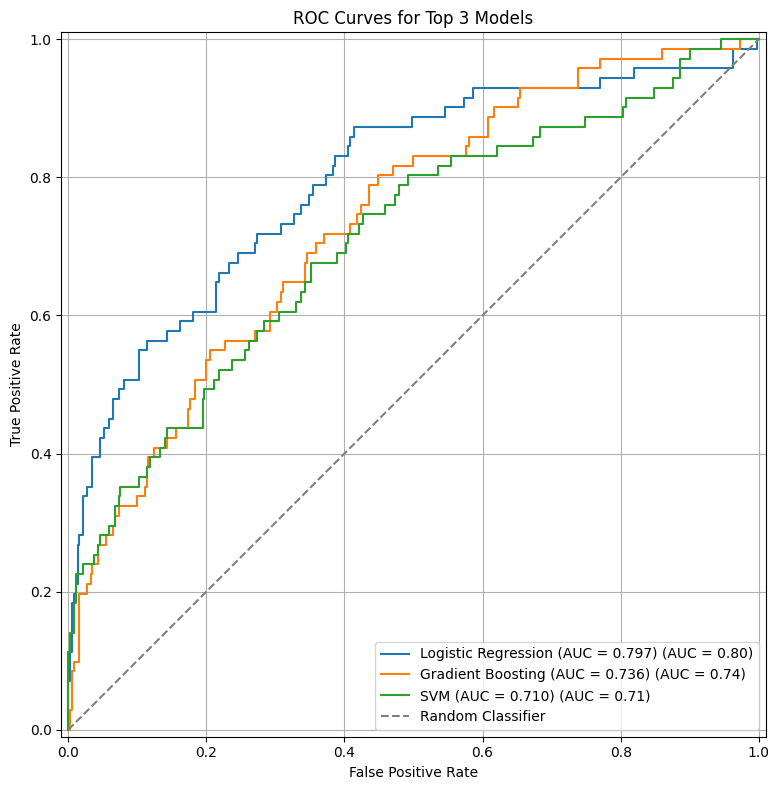

ROC curves for top 3 models plotted successfully.


In [ ]:
plt.figure(figsize=(10, 8))
ax = plt.gca()

# Only plot top 3 models by ROC AUC
top_3_models = ["Logistic Regression", "SVM", "Gradient Boosting"]

for r in tuned_model_evaluation_results:
    model_name = r["model"]

    # Skip if not in top 3
    if model_name not in top_3_models:
        continue

    estimator = r["estimator"]

    # Determine which data to use for evaluation based on the model type
    if model_name in ["Logistic Regression", "SVM", "Neural Network (MLP)"]:
        X_test_input = X_test_scaled
    else:
        X_test_input = X_test

    if hasattr(estimator, "predict_proba"):
        y_score = estimator.predict_proba(X_test_input)[:, 1]
    elif hasattr(estimator, "decision_function"):
        y_score = estimator.decision_function(X_test_input)
    else:
        # Some models might not have proba or decision_function, skip them or handle as needed
        print(f"Skipping {model_name} for ROC curve: No predict_proba or decision_function.")
        continue

    RocCurveDisplay.from_predictions(
        y_test, y_score, name=f"{model_name} (AUC = {r['roc_auc']:.3f})", ax=ax
    )

plt.plot([0, 1], [0, 1], "--", color="gray", label="Random Classifier")
plt.title("ROC Curves for Top 3 Models")  # Updated title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

print("ROC curves for top 3 models plotted successfully.")


Model: Logistic Regression
[[298  72]
 [ 28  43]]


<Figure size 400x400 with 0 Axes>

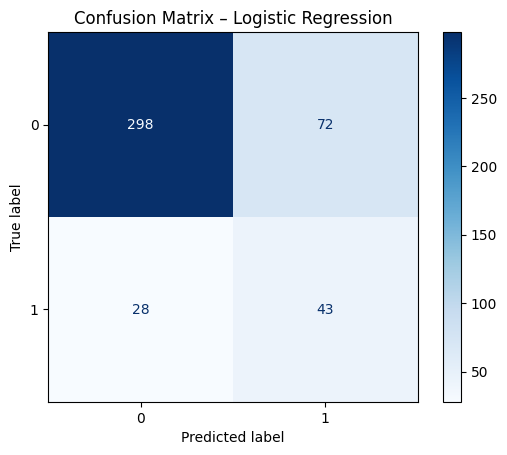


Model: Decision Tree
[[286  84]
 [ 39  32]]


<Figure size 400x400 with 0 Axes>

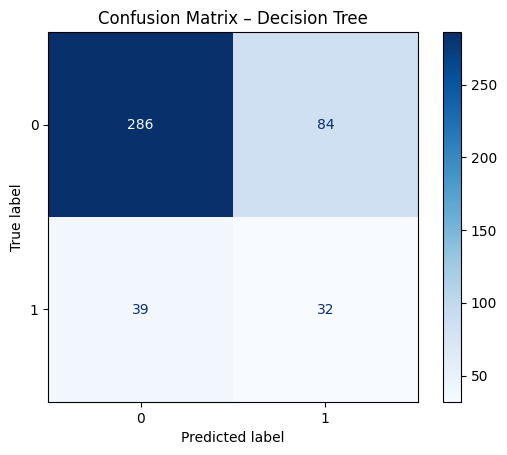


Model: Random Forest
[[347  23]
 [ 50  21]]


<Figure size 400x400 with 0 Axes>

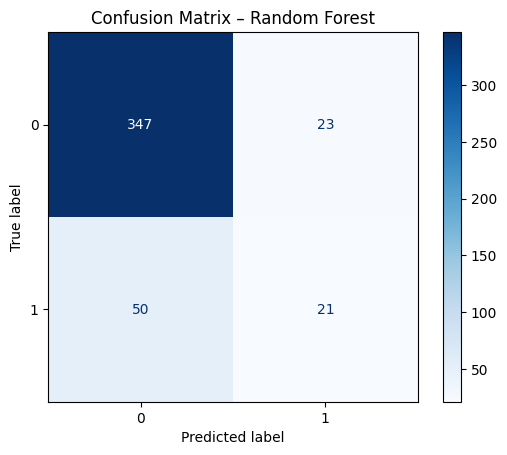


Model: Gradient Boosting
[[357  13]
 [ 54  17]]


<Figure size 400x400 with 0 Axes>

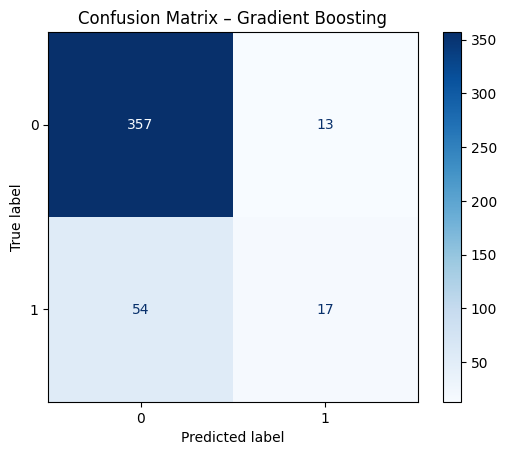


Model: SVM
[[348  22]
 [ 50  21]]


<Figure size 400x400 with 0 Axes>

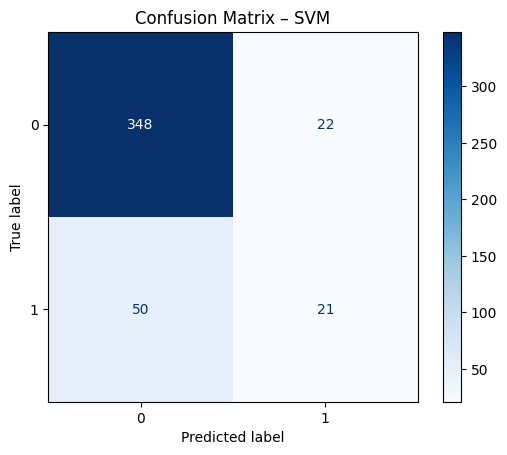


Model: Neural Network (MLP)
[[336  34]
 [ 38  33]]


<Figure size 400x400 with 0 Axes>

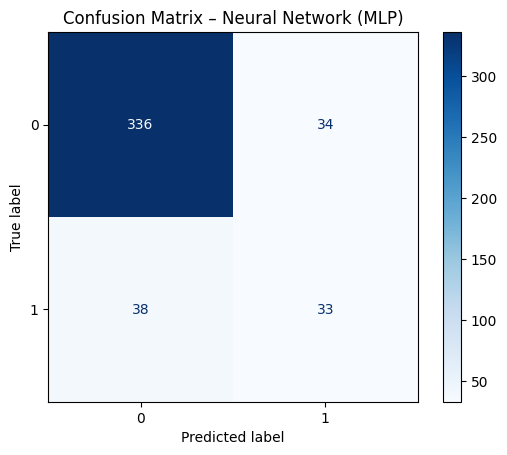

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix for each model
for r in tuned_model_evaluation_results:
    model_name = r["model"]
    cm = r["confusion_matrix"]

    print(f"\nModel: {model_name}")
    print(cm)

    plt.figure(figsize=(4,4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix – {model_name}")
    plt.show()
